# Lecture 10 - DSAI510 Data Science

# Logistic regression

In [3]:
# Run this cell first
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import scipy.stats as stats
import statsmodels.api as sm

# Set the display option to show all rows scrolling with a slider
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)


# pd.options.display.max_rows = 1000
# pd.options.display.max_columns = 20

# To disable this, run the line below:
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc

## Load the dataset

In [5]:
breast = pd.read_csv('./Breast_Cancer_Wisconsin.csv')

print("Number of duplicate records in 'breast':",breast.duplicated().sum()  )

breast = breast.drop(columns='id')
breast.sample(5)

Number of duplicate records in 'breast': 0


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
186,M,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.081690,0.05814,0.1621,0.05425,0.2577,0.4757,1.817,28.92,0.002866,0.009181,0.014120,0.006719,0.01069,0.001087,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.35380,0.15710,0.3206,0.06938,NaN
235,B,14.03,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.01896,0.1517,0.05835,0.2589,1.5030,1.667,22.07,0.007389,0.013830,0.007302,0.010040,0.01263,0.002925,15.33,30.28,98.27,715.5,0.1287,0.15130,0.06231,0.07963,0.2226,0.07617,NaN
510,B,11.74,14.69,76.31,426.0,0.08099,0.09661,0.067260,0.02639,0.1499,0.06758,0.1924,0.6417,1.345,13.04,0.006982,0.039160,0.040170,0.015280,0.02260,0.006822,12.45,17.60,81.25,473.8,0.1073,0.27930,0.26900,0.10560,0.2604,0.09879,NaN
386,B,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.02534,0.1646,0.06154,0.2666,0.8309,2.097,19.96,0.004405,0.030260,0.043440,0.010870,0.01921,0.004622,13.13,19.29,87.65,529.9,0.1026,0.24310,0.30760,0.09140,0.2677,0.08824,NaN
179,B,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,0.06133,0.2889,0.9899,1.778,21.79,0.008534,0.006364,0.006180,0.007408,0.01065,0.003351,13.63,16.15,86.70,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319,NaN


## First Example: Predicting diagnosis (M/B) based on only radius_mean

In [6]:
breast_rad_mean = breast[['diagnosis', 'radius_mean']]
breast_rad_mean.sample(5)

,diagnosis,radius_mean
430,M,14.900
328,M,16.270
71,B,8.888
157,B,16.840
493,B,12.460


In [7]:
label_encoder = LabelEncoder()
# M -> 1, B -> 0
breast_rad_mean['diagnosis'] = label_encoder.fit_transform(breast_rad_mean['diagnosis'])  
breast_rad_mean.sample(5)

/var/folders/38/k8ljbmcj7rx44kfwtmd_03m40000gn/T/ipykernel_5699/4022420469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breast_rad_mean['diagnosis'] = label_encoder.fit_transform(breast_rad_mean['diagnosis'])


,diagnosis,radius_mean
516,1,18.31
87,1,19.02
132,1,16.16
84,0,12.00
362,0,12.76


In [8]:
# Split the dataset into features and target variable
X = breast_rad_mean.drop('diagnosis', axis=1)
y = breast_rad_mean['diagnosis']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
# Here, we can increase the 'max_iter' if the algorithm has trouble converging.
model = LogisticRegression(max_iter=1000)

# Train the logistic regression model
model.fit(X_train, y_train)
model


LogisticRegression(max_iter=1000)

In [9]:
print("β0:",model.intercept_)
print("β1:",model.coef_)

β0: [-14.03968131]
β1: [[0.94882873]]


In [10]:
# List of everything I can ask to "model" 
dir(model)

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'feature_names_in_

In [24]:
# Predictions
y_pred = model.predict(X_test)
print(y_pred)
print(X_test.values.flatten())



[0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]
[12.47  18.94  15.46  12.4   11.54  20.6   22.01  17.57  13.34  13.9
 13.21  16.78  14.97  16.26  12.34  19.1   14.81  10.16   6.981 20.55
 13.8   12.1   21.61  10.03  11.6   13.53  13.28  10.29  12.76  17.2
 11.13  12.06   9.742 13.68  10.18  11.52  16.02  11.74  18.25  14.62
 10.49  15.08  11.61  11.84  11.89  11.34   9.295  9.423 11.67  12.89
 17.19  18.63  13.11  13.94  11.9   13.17  10.25  25.22  13.48  11.29
 12.86  19.69  21.56  14.4   12.3   12.62  15.78  20.18  11.81  12.98
 13.77  15.78  14.06  16.46   7.729 13.47  14.03  13.96  10.75  11.27
 16.16  11.25  14.48  20.94  17.93  15.32  12.46  17.6   12.05  12.86
 12.    13.46  15.04  11.2   11.22   9.777 20.13  13.81  11.15  17.27
 15.7    9.738 18.05  17.99  10.82  11.75  12.34  23.09  14.44  14.64

In [25]:
# Highlight in red the wrong predictions

y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=['y (pred)']).reset_index(drop=True)
test = pd.concat([X_test['radius_mean'].reset_index(drop=True), y_test_df, y_pred_df], axis=1)
test.columns = ['radius_mean', 'y (truth)', 'y (pred)']


def highlight_mismatches(row):
    # Compare if the values in 'y (truth)' and 'y (pred)' are not the same
    mismatch = row['y (truth)'] != row['y (pred)']
    
    # 'background-color: red' if mismatch else ''
    return ['background-color: red' if mismatch else '' for _ in row]


# Apply the style to the DataFrame and display it
test_styled = test.style.apply(highlight_mismatches, axis=1)
test_styled

,radius_mean,y (truth),y (pred)
0,12.470000,0,0
1,18.940000,1,1
2,15.460000,1,1
3,12.400000,0,0
4,11.540000,0,0
5,20.600000,1,1
6,22.010000,1,1
7,17.570000,1,1
8,13.340000,0,0
9,13.900000,0,0


In [26]:
# Count number of misclassifications

mismatches = (test['y (truth)'] != test['y (pred)']).sum()
print("Wrongly classified records in the test data:",mismatches)
print("Total records in the test data:",len(y_pred))


Wrongly classified records in the test data: 10
Total records in the test data: 114


In [27]:
# Evaluate the model performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9122807017543859


              precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.92      0.84      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



#### Decision boundary
- The intersection between the model (sigmoid) and y=0.5 threshold is the boundary.
- In one dimension (there's just one predictor here: radius_mean) the boundary is a point, which is calculated below as 14.8.

In [28]:
print("β0:",model.intercept_)
print("β1:",model.coef_)
β0 = model.intercept_[0]
β1 = model.coef_[0,0]


# To find the boundary, equate the linear part of the model to 0.
# β0 + β1 radius_mean = 0
# radius_mean_boundary = -β0/β1

radius_mean_boundary = -β0/β1
print("\n radius_mean_boundary:",radius_mean_boundary)

β0: [-14.03968131]
β1: [[0.94882873]]

 radius_mean_boundary: 14.796855233170156


/Users/mango/anaconda3/envs/mytorch/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


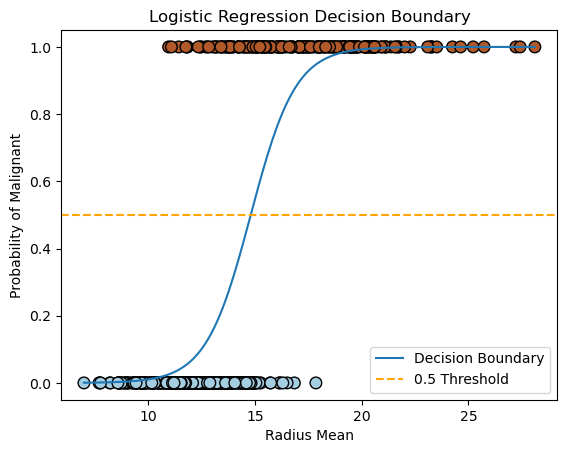

In [ ]:
# Now plot the decision boundary
# Generate a sequence of values from minimum to maximum radius mean values
x_values = np.linspace(X['radius_mean'].min(), X['radius_mean'].max(), 200)
# Predict probabilities for these values
y_values = model.predict_proba(x_values.reshape(-1, 1))[:, 1]

# Plot the decision boundary
plt.scatter(X['radius_mean'], y, c=y, cmap=plt.cm.Paired, edgecolor='k', s=70)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.axhline(y=0.5, color='orange', linestyle='--', label='0.5 Threshold')
plt.xlabel('Radius Mean')
plt.ylabel('Probability of Malignant')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()
# This code will plot the probability predictions as a function of the 'radius_mean' feature, 
# and you'll see a decision boundary at the point where the probability crosses the 0.5 threshold. 
# The scatter plot will show the original data points colored by their actual class label.
# Remeber decision boundary is at 14.8.

## Now let's use two predictors: radius_mean and area_mean

In [33]:
breast_rad_area_mean = breast[['diagnosis', 'radius_mean','area_mean']]

label_encoder = LabelEncoder()
# M -> 1, B -> 0
breast_rad_area_mean['diagnosis'] = label_encoder.fit_transform(breast_rad_area_mean['diagnosis'])  
print(breast_rad_area_mean.sample(5),"\n\n")

# Split the dataset into features and target variable
X = breast_rad_area_mean.drop('diagnosis', axis=1)
y = breast_rad_area_mean['diagnosis']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
# Here, we can increase the 'max_iter' if the algorithm has trouble converging.
model = LogisticRegression(max_iter=1000)

# Train the logistic regression model
model.fit(X_train, y_train)


print("β0:",model.intercept_)
print("β1, β2:",model.coef_)

     diagnosis  radius_mean  area_mean
72           1        17.20      929.4
564          1        21.56     1479.0
410          0        11.36      399.8
516          1        18.31     1052.0
483          0        13.70      571.1 


β0: [-4.56259819]
β1, β2: [[-0.40582747  0.01549391]]


/var/folders/38/k8ljbmcj7rx44kfwtmd_03m40000gn/T/ipykernel_5699/1992541340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breast_rad_area_mean['diagnosis'] = label_encoder.fit_transform(breast_rad_area_mean['diagnosis'])


In [34]:
# The code below produces predictions (0/1) for the threshold value 0.5.
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9210526315789473


              precision    recall  f1-score   support

           0       0.91      0.97      0.94        71
           1       0.95      0.84      0.89        43

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [35]:
# blue colors: fn= 7
# yellow colors: fp = 2

# Combine y_pred and y_test into a DataFrame
results = pd.DataFrame({
    'y_pred': y_pred,
    'y_test': y_test.values
})

# Define a function to apply the highlighting
def highlight_rows(s):
    if s.y_pred == 1 and s.y_test == 0:
        return ['background-color: yellow']*len(s)
    elif s.y_pred == 0 and s.y_test == 1:
        return ['background-color: blue']*len(s)
    else:
        return ['']*len(s)

# Apply the highlight function to the DataFrame
styled_results = results.style.apply(highlight_rows, axis=1)
styled_results


,y_pred,y_test
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


### Confusion matrix
- Not that confusion matrix may be shown in different ways as rows may be the actual (data) values or predicted values. 
- To get the confustion matrix exactly as shown below, use the code below.

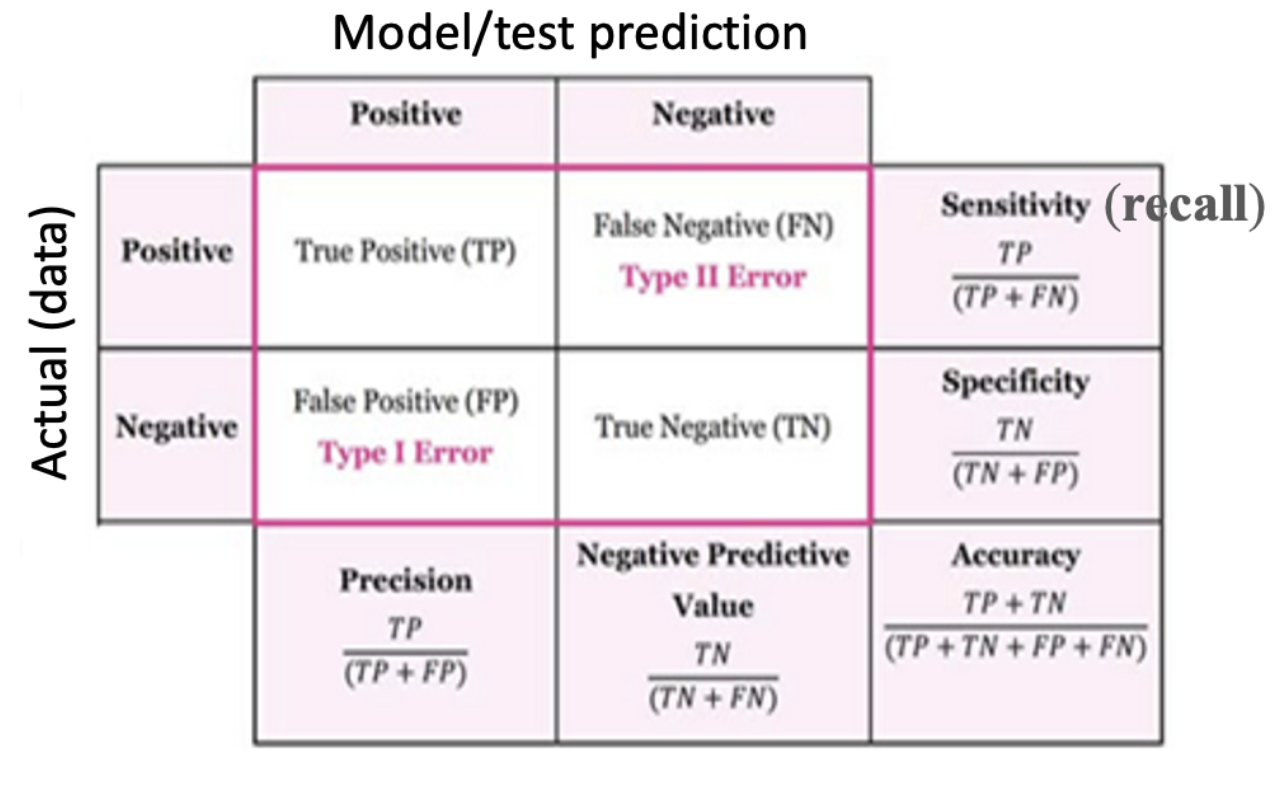




In [36]:
# Use this form, don't change the order "y_test, y_pred", otherwise, 
# you'll the numbers in different slots in the matrix.

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
cm

array([[36,  7],
       [ 2, 69]])

In [37]:
tp, fn, fp, tn = cm.ravel()
print("tp, fn, fp, tn: ", tp, "," ,fn,",", fp,"," ,tn)

tp, fn, fp, tn:  36 , 7 , 2 , 69


In [38]:
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")
precision = tp / (tp + fp)
print(f"Precision: {precision}")
sensitivity = tp / (tp + fn)
print(f"Sensitivity (recall): {sensitivity}")

Specificity: 0.971830985915493
Precision: 0.9473684210526315
Sensitivity (recall): 0.8372093023255814


### Plot the ROC curve, show some threshold values on the curve

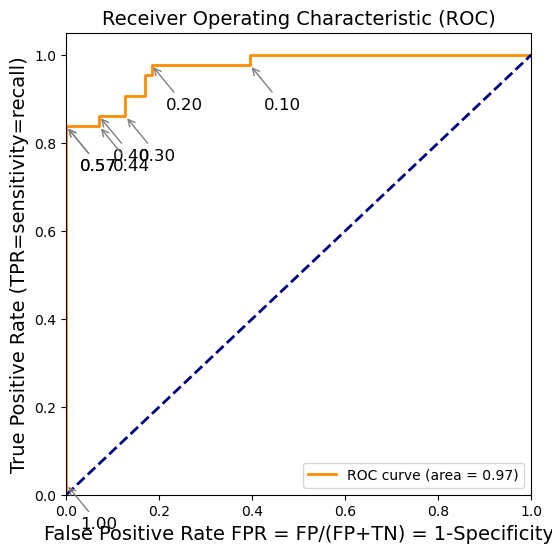

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))  # Larger figure size

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate FPR = FP/(FP+TN) = 1-Specificity', fontsize=14)
plt.ylabel('True Positive Rate (TPR=sensitivity=recall)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.legend(loc="lower right")

# Specify the thresholds you want to annotate
desired_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]

# Find the closest actual thresholds from the ROC curve to the desired ones
for desired in desired_thresholds:
    closest = np.argmin(np.abs(thresholds - desired))
    plt.annotate(f'{thresholds[closest]:.2f}',
                 xy=(fpr[closest], tpr[closest]), xycoords='data',
                 xytext=(fpr[closest] + 0.03, tpr[closest] - 0.1), textcoords='data',
                 arrowprops=dict(arrowstyle="->", color="gray"),
                 fontsize=12)

plt.show()


## Using custom threshold

- According to the ROC curve above, it seems that 0.57 is the threshold value where the classifier gives maximum number of true positives while not allowing any false positives. Let's use 0.57 instead of 0.5 as the threshold value and get the confusion matrix for that threshold value.

In [ ]:
# Here we can't use "model.predict(X_test)" since it uses threshold=0.5.
# So we need write a code so we can make prediction with custom threshold values.

# get probabilities for the positive class
probabilities = model.predict_proba(X_test)[:, 1]  

# Define your custom threshold
threshold = 0.57

# Convert probabilities to class predictions using the custom threshold
y_pred_custom_threshold = np.where(probabilities >= threshold, 1, 0)

cm = confusion_matrix(y_test, y_pred_custom_threshold, labels=[1,0])
cm

# compare with the cm obtained previously with threshold=0.5
# array([[36,  7],
#       [ 2, 69]])


array([[35,  8],
       [ 0, 71]])

- As can be seen above, 0.57 yielded zero false positive (bottom left corner of the confusion matrix). 
- Note that you may want more true positives at the expense of a few false positives. In that case, you may lower the threshold. Looking at the ROC curve above, lowering it down to 0.2 is possible. How lower can you go in the threshold? You decide it; as go lower in that you'll get more true positives at the expense of more false positives. So you decide how much false positives you can tolarate depending on the problem at hand. 
- Take COVID-19 testing as an example: prioritizing a higher detection rate for true positives is crucial, even if it leads to a rise in false positives. The impact of false positives is relatively minor, generally resulting in self-isolation, but missing true positives could have significant health consequences.

#### Decision boundary between radius_mean and area_mean

/Users/mango/anaconda3/envs/mytorch/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


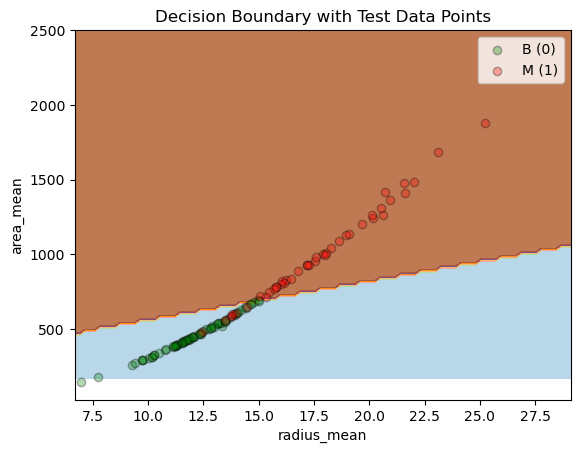

In [45]:
# Define the mesh grid for both features
x_min, x_max = X_train['radius_mean'].min() - 1, X_train['radius_mean'].max() + 1
y_min, y_max = X_train['area_mean'].min() - 1, X_train['area_mean'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the mesh grid to get the decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Plot the test points, coloring them based on their actual labels
plt.scatter(X_test['radius_mean'][y_test == 0], X_test['area_mean'][y_test == 0], c='green', label='B (0)', edgecolor='k', alpha=0.3)
plt.scatter(X_test['radius_mean'][y_test == 1], X_test['area_mean'][y_test == 1], c='red', label='M (1)', edgecolor='k', alpha=0.3)

plt.xlabel('radius_mean')
plt.ylabel('area_mean')
plt.title('Decision Boundary with Test Data Points')
plt.legend()
plt.show()


Decision boundary is given by $β_0 + β_1 x_1 + β_2 x_2 = 0$ where $x_1$=radius_mean and $x_2$=area_mean. Since we found $β_0$= -4.56266604, $β_1$= -0.40581816 and $β_2$= 0.01549381, the boundary line is given by 
$$-4.56266604 -0.40581816 \textbf{ radius mean} + 0.01549381 \textbf{ area mean} = 0,$$
which is shows as the red line in the plot above.

In [46]:
breast_rad_area_mean.corr()

,diagnosis,radius_mean,area_mean
diagnosis,1.000000,0.730029,0.708984
radius_mean,0.730029,1.000000,0.987357
area_mean,0.708984,0.987357,1.000000


#### Decision boundary between radius_mean and texture_se

sample data:
     diagnosis  radius_mean  texture_se
160          0       11.750       1.693
61           0        8.598       2.067
547          0       10.260       1.023
409          0       12.270       1.781
568          0        7.760       1.428 


Accuracy: 0.9122807017543859


              precision    recall  f1-score   support

           0       0.92      0.94      0.93        71
           1       0.90      0.86      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



/var/folders/38/k8ljbmcj7rx44kfwtmd_03m40000gn/T/ipykernel_5699/3077072244.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breast_rad_tex['diagnosis'] = label_encoder.fit_transform(breast_rad_tex['diagnosis'])
/Users/mango/anaconda3/envs/mytorch/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


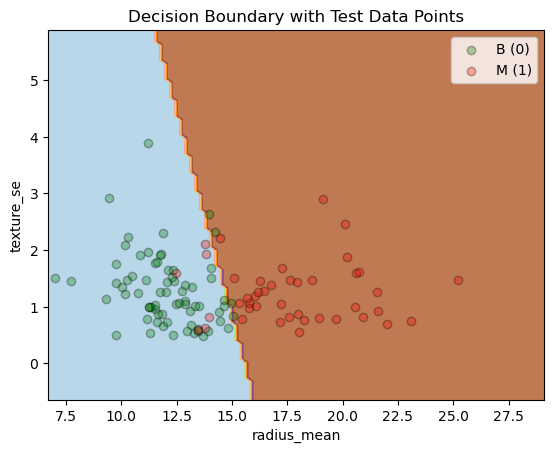

In [49]:
breast_rad_tex = breast[['diagnosis', 'radius_mean','texture_se']]

label_encoder = LabelEncoder()
# M -> 1, B -> 0
breast_rad_tex['diagnosis'] = label_encoder.fit_transform(breast_rad_tex['diagnosis'])  
print("sample data:")
print(breast_rad_tex.sample(5),"\n\n")

# Split the dataset into features and target variable
X = breast_rad_tex.drop('diagnosis', axis=1)
y = breast_rad_tex['diagnosis']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
# Here, we can increase the 'max_iter' if the algorithm has trouble converging.
model = LogisticRegression(max_iter=1000)

# Train the logistic regression model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n\n")
print(classification_report(y_test, y_pred))


# Define the mesh grid for both features
x_min, x_max = X_train['radius_mean'].min() - 1, X_train['radius_mean'].max() + 1
y_min, y_max = X_train['texture_se'].min() - 1, X_train['texture_se'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the mesh grid to get the decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Plot the test points, coloring them based on their actual labels
plt.scatter(X_test['radius_mean'][y_test == 0], X_test['texture_se'][y_test == 0], c='green', label='B (0)', edgecolor='k', alpha=0.3)
plt.scatter(X_test['radius_mean'][y_test == 1], X_test['texture_se'][y_test == 1], c='red', label='M (1)', edgecolor='k', alpha=0.3)

plt.xlabel('radius_mean')
plt.ylabel('texture_se')
plt.title('Decision Boundary with Test Data Points')
plt.legend()
plt.show()

